<a href="https://colab.research.google.com/github/ReynaldoAVZ/Scientific-Machine-Learning-7750/blob/main/HW1/HW1_AppliedMathForMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Consider the two matrices given as:
# A = [1, 4, -3; 2, 5, 4] and B = [4, 1; 2, 6; 0, 3]
---
a) What is the rank of each matrix?

b) Calculate the multiplication AB and BA by hand. Are they equal?

c) What is the rank of AB and BA? In the case of the matrix that becomes
3*3 rank might not be obvious and you can use Python or Matlab to get
the rank (search for the command).

d) One of the two multiplications above were not full rank. Demonstrate that
the matrix is not full rank with another metric beyond rank (you can use
Matlab/Python to calculate that metric).


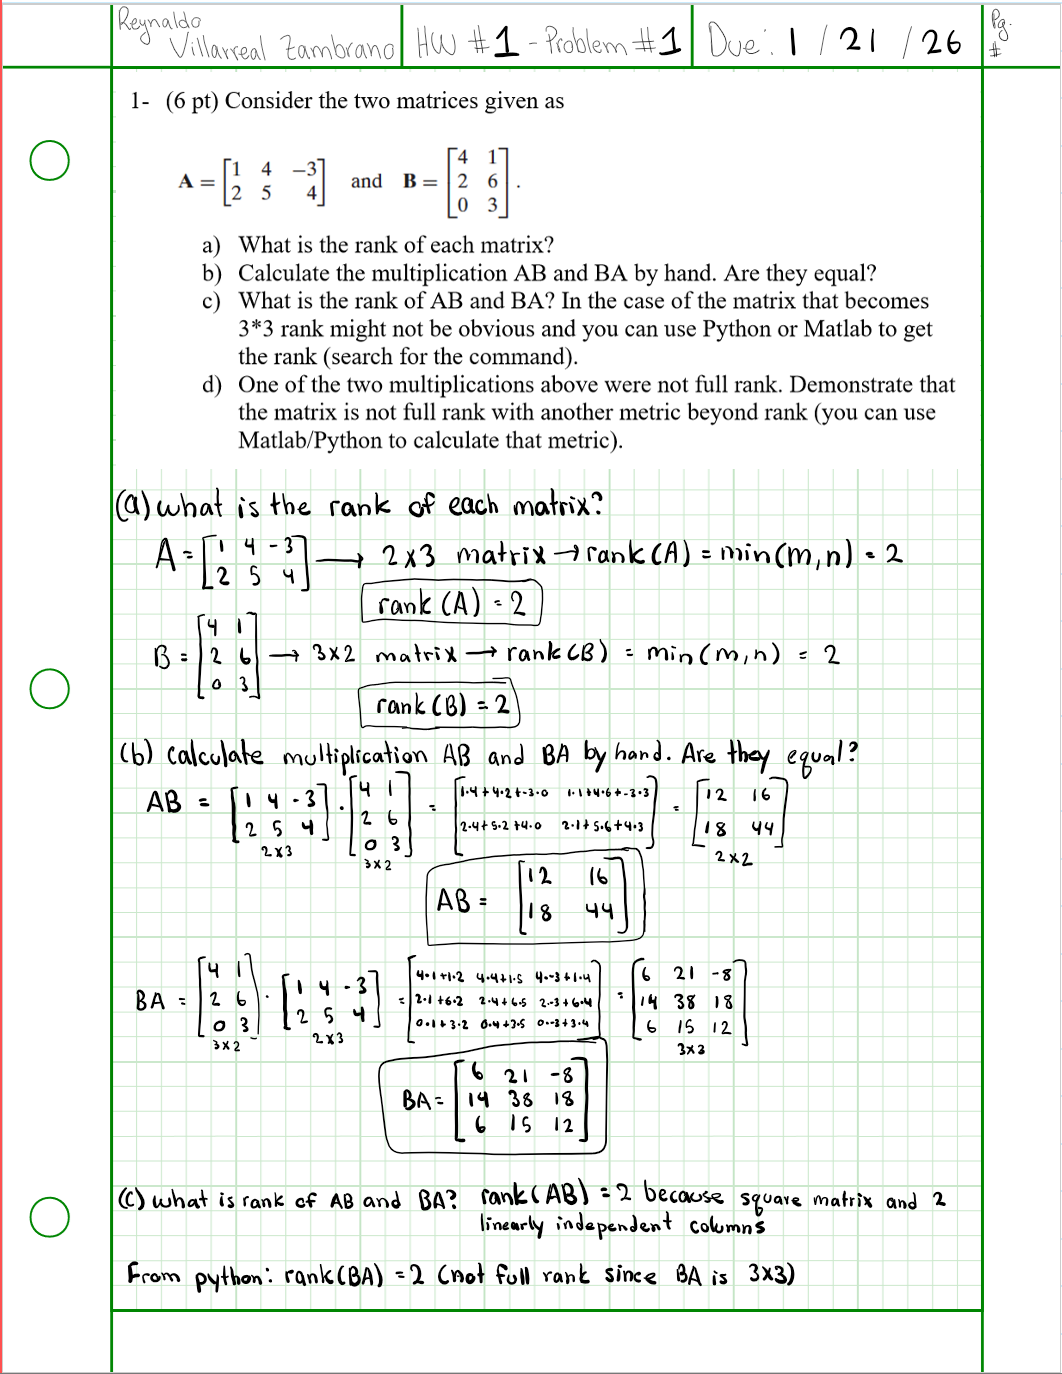

In [40]:
# import libraries
import numpy as np

# (a) what is the rank of each matrix? (hand work shown above)

# declare given matrices
A = np.array([[1, 4, -3], [2, 5, 4]])
B = np.array([[4, 1], [2, 6], [0, 3]])

# calculate the rank and print results
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)
print("Problem 1 (a):\n")
print(f"Rank of A: {rank_A}")
print(f"Rank of B: {rank_B}\n")

# (b) calculate the multiplication AB and BA by hand. Are they equal?
# (hand work shown above)
AB = np.matmul(A, B)
BA = np.matmul(B, A)
print("Problem 1 (b):\n")
print(f"Result of Matrix A x Matrix B:")
print(f"AB:\n{AB}")
print(f"Result of Matrix B x Matrix A:")
print(f"BA:\n{BA}\n")
if(np.array_equal(AB, BA)):
    print("AB and BA are equal")
    print(f"Dimensions of AB: {np.shape(AB)}")
    print(f"Dimensions of BA: {np.shape(BA)}\n")
else:
    print(f"AB and BA are not equal")
    print(f"Dimensions of AB: {np.shape(AB)}")
    print(f"Dimensions of BA: {np.shape(BA)}\n")

# (c) What is the rank of AB and BA? In the case of the matrix that becomes
# 3 x 3 rank might not be obvious and you can use Python or Matlab to get the
# rank (search for the command). (hand work shown above)

# calculate the rank and print result
rank_AB = np.linalg.matrix_rank(AB)
rank_BA = np.linalg.matrix_rank(BA)
print("Problem 1 (c):\n")
print(f"Rank of AB: {rank_AB}")
print(f"Dimensions of AB: {np.shape(AB)}")
print(f"Rank of BA: {rank_BA}")
print(f"Dimensions of BA: {np.shape(BA)}\n")

# (d) One of the two multiplications above were not full rank. Demonstrate that
# the matrix is not full rank with another metric beyond rank (you can use
# Matlab/Python to calculate that metric).

# find the number of eigen values for each matrix (can do this if square) and
# if the number of non-zero eigenvalues equals the dim of matrix, then it is
# full rank.
eigenvalues_AB = np.linalg.eigvals(AB)
eigenvalues_BA = np.linalg.eigvals(BA)
tol = 1e-6
nonzero_eigenvalues_AB = eigenvalues_AB[np.abs(eigenvalues_AB) > tol]
nonzero_eigenvalues_BA = eigenvalues_BA[np.abs(eigenvalues_BA) > tol]
print("Problem 1 (d):\n")
print(f"Eigenvalues of AB: {eigenvalues_AB}")
print(f"Dimensions of AB: {np.shape(AB)}")
print(f"Non-zero Eigenvalues of AB: {nonzero_eigenvalues_AB}")
print(f"Number of Non-zero Eigenvalues of AB: {nonzero_eigenvalues_AB.size}")
print(f"Number of Zero-Value Eigenvalues of AB: {eigenvalues_AB.size - nonzero_eigenvalues_AB.size}")
print(f"Eigenvalues of BA: {eigenvalues_BA}")
print(f"Dimensions of BA: {np.shape(BA)}")
print(f"Non-zero Eigenvalues of BA: {nonzero_eigenvalues_BA}")
print(f"Number of Non-zero Eigenvalues of BA: {nonzero_eigenvalues_BA.size}")
print(f"Number of Zero-Value Eigenvalues of BA: {eigenvalues_BA.size - nonzero_eigenvalues_BA.size}\n")


Problem 1 (a):

Rank of A: 2
Rank of B: 2

Problem 1 (b):

Result of Matrix A x Matrix B:
AB:
[[12 16]
 [18 44]]
Result of Matrix B x Matrix A:
BA:
[[ 6 21 -8]
 [14 38 18]
 [ 6 15 12]]

AB and BA are not equal
Dimensions of AB: (2, 2)
Dimensions of BA: (3, 3)

Problem 1 (c):

Rank of AB: 2
Dimensions of AB: (2, 2)
Rank of BA: 2
Dimensions of BA: (3, 3)

Problem 1 (d):

Eigenvalues of AB: [ 4.67619242 51.32380758]
Dimensions of AB: (2, 2)
Non-zero Eigenvalues of AB: [ 4.67619242 51.32380758]
Number of Non-zero Eigenvalues of AB: 2
Number of Zero-Value Eigenvalues of AB: 0
Eigenvalues of BA: [5.13238076e+01 4.50279750e-16 4.67619242e+00]
Dimensions of BA: (3, 3)
Non-zero Eigenvalues of BA: [51.32380758  4.67619242]
Number of Non-zero Eigenvalues of BA: 2
Number of Zero-Value Eigenvalues of BA: 1



# 2. Prove/Investigate the following statements.
---
a) Given an arbitrary matrix A, show that A^TA is always symmetric (show that it is equal to its transpose).

b) Given an arbitrary matrix C and vector x, we can calculate the sign of x^TCx to predict the sign of the eigenvalues (they are the same). Consider a matrix of the general form A^TA, and plug it into this form (x^TCx), and show that the term becomes always positive. Therefore, we can conclude that A^TA always has positive eigenvalues.  

c) Python/Matlab: Generate an arbitrary 4*4 matrix that is NOT full-rank.  
Now add some noise (e.g., generated using random number sampled from
a Normal distribution with standard deviation equal to 10% of the entry’s
value) to all elements of the matrix. What is the rank now? Comment on
your findings.  

d) Matrix decompositions play a big role in linear algebra. Pick one matrix
decomposition (e.g., eigendecomposition, or Schur decomposition, or QR
decomposition, ..). Search and read a bit about the decomposition online.
Explain it very briefly and mention:  for what kind of input matrix it exists and what are the sizes of each matrix appearing in the decomposition.

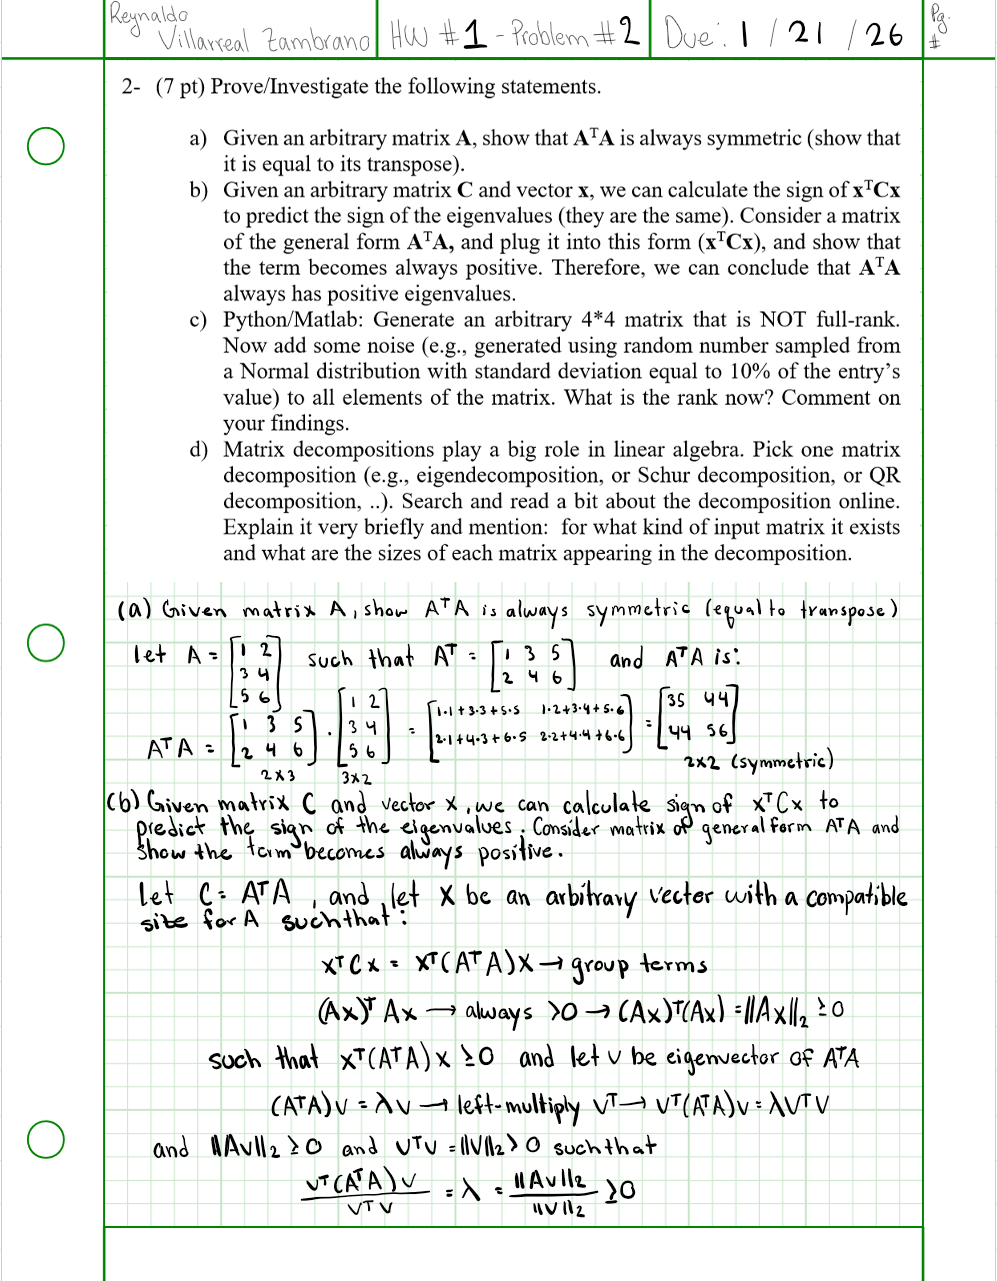

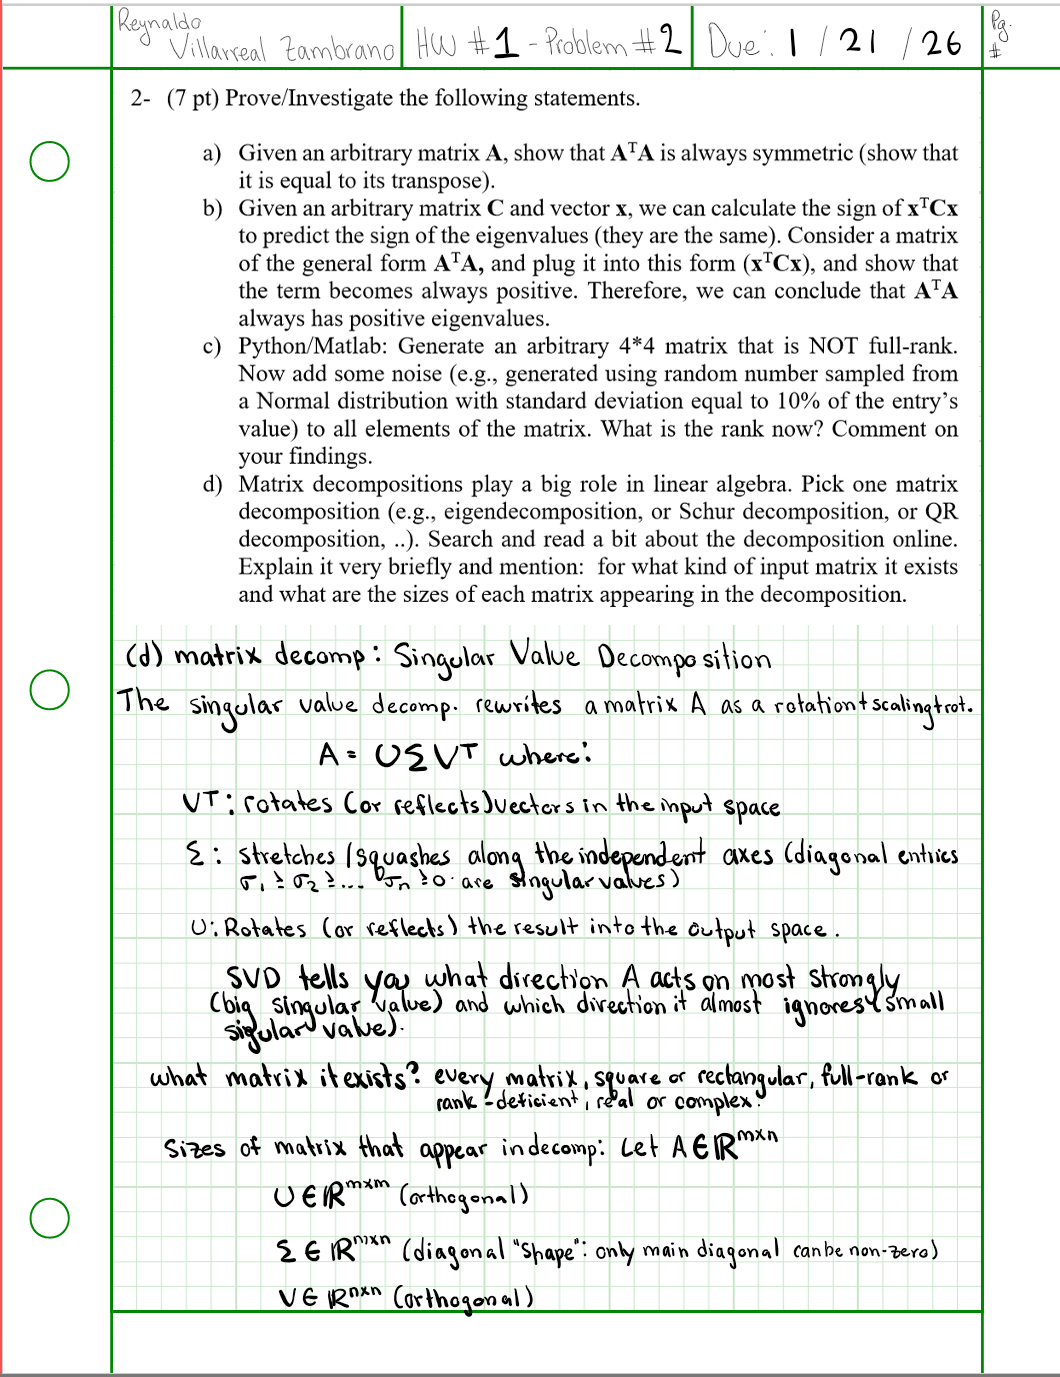

In [41]:
# (a) Given an arbitrary matrix A, show that ATA is always symmetric (show that
# it is equal to its transpose). (hand work shown above)

# (b) b) Given an arbitrary matrix C and vector x, we can calculate the sign of xTCx
# to predict the sign of the eigenvalues (they are the same). Consider a matrix
# of the general form ATA, and plug it into this form (xTCx), and show that
# the term becomes always positive. Therefore, we can conclude that ATA
# always has positive eigenvalues. (hand work shown above)

# (c) c) Python/Matlab: Generate an arbitrary 4*4 matrix that is NOT full-rank.
# Now add some noise (e.g., generated using random number sampled from
# a Normal distribution with standard deviation equal to 10% of the entry’s
# value) to all elements of the matrix. What is the rank now? Comment on
# your findings.

# declare not full-rank matrix
NonFullRankMatrix = np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8],
                              [9, 10, 11, 12],
                              [13, 14, 15, 16]])
print("Problem 2 (c):\n")
print(f"Non-Full-Rank Matrix:\n{NonFullRankMatrix}")
print(f"Dimensions of Non-Full-Rank Matrix: {np.shape(NonFullRankMatrix)}")
print(f"Rank of Non-Full-Rank Matrix: {np.linalg.matrix_rank(NonFullRankMatrix)}")

# add noise to non-full-rank matrix with normal distribution and standard
# deviation equal to 10% of the entry's values
noise = np.random.normal(0, 0.1 * np.abs(NonFullRankMatrix), NonFullRankMatrix.shape)
noisy_matrix = NonFullRankMatrix + noise
print(f"Noise Matrix:\n{noise}")
print(f"Non-Full-Rank Matrix + Noise Matrix:\n{noisy_matrix}")
print(f"Dimensions of Noisy Matrix: {np.shape(noisy_matrix)}")
print(f"Rank of Noisy Matrix: {np.linalg.matrix_rank(noisy_matrix)}\n")
print(
    "Comment:\n"
    "The original matrix is rank-deficient because it has \nexact linear",
    "dependencies (its columns/rows lie in a \nlower-dimensional subspace),",
    "which is equivalent to \nhaving det(A)=0 and at least one singular value",
    "exactly \nequal to zero.\nWhen we add random noise drawn from a ",
    "continuous \ndistribution (Normal) to every entry, those exact\nequalities",
    "are almost surely broken, so det(A+E) becomes \nnonzero and the matrix",
    "becomes full rank (rank 4).\nNumerically, this means the singular values",
    "that were zero\nbecome small but positive; if they exceed NumPy's rank",
    "tolerance\nnp.linalg.matrix_rank reports the matrix as full rank."
)


# (d) Matrix decompositions play a big role in linear algebra. Pick one matrix
# decomposition (e.g., eigendecomposition, or Schur decomposition, or QR
# decomposition, ..). Search and read a bit about the decomposition online.
# Explain it very briefly and mention:  for what kind of input matrix it exists
# and what are the sizes of each matrix appearing in the decomposition.
# (hand work shown above)

Problem 2 (c):

Non-Full-Rank Matrix:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Dimensions of Non-Full-Rank Matrix: (4, 4)
Rank of Non-Full-Rank Matrix: 2
Noise Matrix:
[[-0.11316203  0.151745   -0.01422887 -0.39344879]
 [-0.16240043  0.56984181  0.0291519  -0.1317038 ]
 [ 0.45801321 -0.30150741 -0.10869288 -0.31537636]
 [-0.46308856  0.71080082 -1.55946624  0.39711412]]
Non-Full-Rank Matrix + Noise Matrix:
[[ 0.88683797  2.151745    2.98577113  3.60655121]
 [ 4.83759957  6.56984181  7.0291519   7.8682962 ]
 [ 9.45801321  9.69849259 10.89130712 11.68462364]
 [12.53691144 14.71080082 13.44053376 16.39711412]]
Dimensions of Noisy Matrix: (4, 4)
Rank of Noisy Matrix: 4

Comment:
The original matrix is rank-deficient because it has 
exact linear dependencies (its columns/rows lie in a 
lower-dimensional subspace), which is equivalent to 
having det(A)=0 and at least one singular value exactly 
equal to zero.
When we add random noise drawn from a  continuous 
distribution

# 3. Input a small dataset from your research into a matrix A such that the columns/rows have meanings as described in Lecture 1. You can downsample your data if you deal with large size data.
---
a) Mention what your problem is and describe what the columns and rows are in the context of your problem.

b) Calculate 3 of the metrics we reviewed in the lecture for your matrix (e.g., eigenvalues , ..)

c) Calculate ATA to make your matrix A symmetric and square. Is your ATA matrix invertible?  What is its rank and how does that compare with the max rank it can potentially have? You should use Matlab/Python for the above calculations.

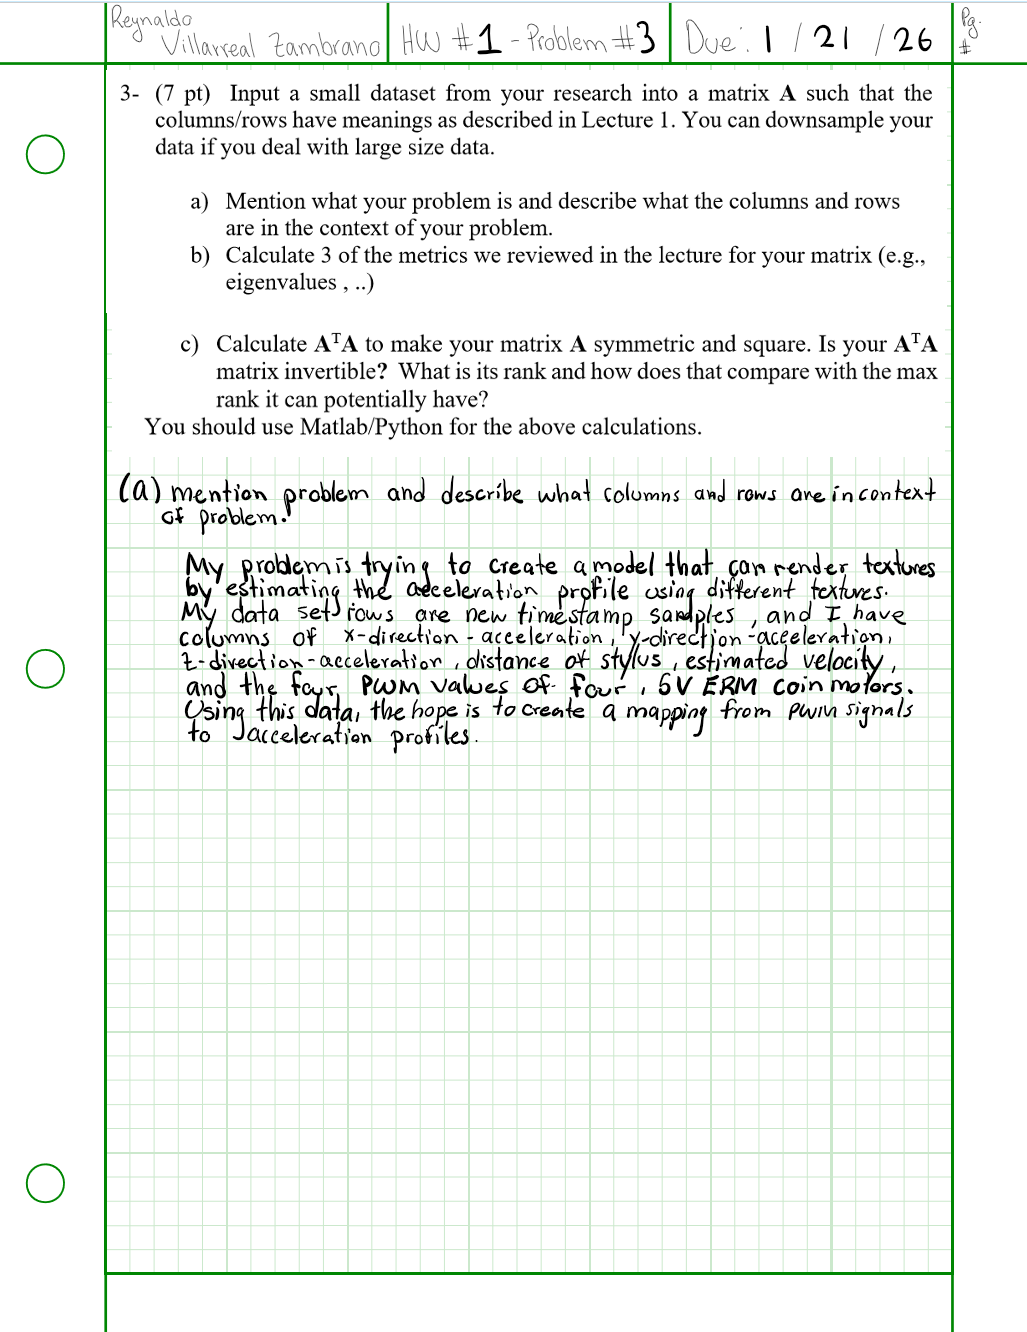

In [42]:
# (a) Mention what your problem is and describe what the columns and rows
# are in the context of your problem. (hand work shown above)

# (b) Calculate 3 of the metrics we reviewed in the lecture for your matrix (e.g.,
# eigenvalues , ..)

# load data sets i will use
import pandas as pd

Texture1_MotorData = pd.read_csv('/content/Texture1_MotorData.csv')

# remove time_us_normalized from both data sets but save them in variable
Texture1_MotorData_Time = Texture1_MotorData['time_us_normalized']
Texture1_MotorData = Texture1_MotorData.drop(columns=['time_us_normalized'])

# display head of data
display(Texture1_MotorData.head())

# normalize our data
Texture1_MotorData = (Texture1_MotorData - Texture1_MotorData.mean()) / Texture1_MotorData.std()

# display head of data
display(Texture1_MotorData.head())

# calculate 3 metrics for data (determinan, frobenius norm, numerical rank)
Texture1_MotorData_Sym = np.matmul(Texture1_MotorData.T, Texture1_MotorData)

# calculate metrics
Texture1_MotorData_Eigenvalues = np.linalg.eigvals(Texture1_MotorData_Sym)
Texture1_MotorData_FrobeniusNorm = np.linalg.norm(Texture1_MotorData, ord='fro')
Texture1_MotorData_NumericalRank = np.linalg.matrix_rank(Texture1_MotorData)
print("Problem 3 (b):\n")
print(f"Eigenvalues of Texture1_MotorData_Sym: {Texture1_MotorData_Eigenvalues}")
print(f"Frobenius Norm of Texture1_MotorData: {Texture1_MotorData_FrobeniusNorm}")
print(f"Numerical Rank of Texture1_MotorData: {Texture1_MotorData_NumericalRank}\n")

# (c) Calculate ATA to make your matrix A symmetric and square. Is your ATA
# matrix invertible?  What is its rank and how does that compare with the max
# rank it can potentially have?
# You should use Matlab/Python for the above calculations.

# make data symmetric and square

# convert data frame to numpy
Texture1_MotorData_Sym = Texture1_MotorData_Sym.to_numpy()

# check if numpy array is invertible and check its rank and compare with max
# rank it can potentially have
n, m = Texture1_MotorData_Sym.shape
is_invertible = (n == m) and (np.linalg.matrix_rank(Texture1_MotorData_Sym) == n)
Texture1_MotorData_Sym_Rank = np.linalg.matrix_rank(Texture1_MotorData_Sym)
print("Problem 3 (c):\n")
print(f"Is Texture1_MotorData_Sym invertible? {is_invertible}")
print(f"Rank of Texture1_MotorData_Sym: {Texture1_MotorData_Sym_Rank}")
print(f"Max Potential Rank of Texture1_MotorData_Sym: {min(n, m)}")


,accel_x_raw,accel_y_raw,accel_z_raw,distance_cm,velocity_cm_s,pwm1,pwm2,pwm3,pwm4
0,169,176,175,0.0,0.0,0.0,0.0,0.0,0.0
1,169,176,175,0.0,0.0,0.0,0.0,0.0,0.0
2,169,176,175,0.0,0.0,0.0,0.0,0.0,0.0
3,169,176,176,0.0,0.0,0.0,0.0,0.0,0.0
4,169,176,176,0.0,0.0,0.0,0.0,0.0,0.0


,accel_x_raw,accel_y_raw,accel_z_raw,distance_cm,velocity_cm_s,pwm1,pwm2,pwm3,pwm4
0,0.02094,-0.052275,-0.017740,-2.836057,-0.054152,-1.276457,-1.455805,-1.093004,-0.943305
1,0.02094,-0.052275,-0.017740,-2.836057,-0.054152,-1.276457,-1.455805,-1.093004,-0.943305
2,0.02094,-0.052275,-0.017740,-2.836057,-0.054152,-1.276457,-1.455805,-1.093004,-0.943305
3,0.02094,-0.052275,0.052345,-2.836057,-0.054152,-1.276457,-1.455805,-1.093004,-0.943305
4,0.02094,-0.052275,0.052345,-2.836057,-0.054152,-1.276457,-1.455805,-1.093004,-0.943305


Problem 3 (b):

Eigenvalues of Texture1_MotorData_Sym: [69450.90056078 28552.7223183  21276.19955714 19438.67832898
 16571.6730512   9549.64466493  5849.14454632  1668.50509393
   505.5318784 ]
Frobenius Norm of Texture1_MotorData: 415.7679641338392
Numerical Rank of Texture1_MotorData: 9

Problem 3 (c):

Is Texture1_MotorData_Sym invertible? True
Rank of Texture1_MotorData_Sym: 9
Max Potential Rank of Texture1_MotorData_Sym: 9
